In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
from scipy.stats import *
import random

# Law of large numbers

## Task 1 Coin toss
Try simulating coin tosses using the coinToss function. The function outputs the number of trials, the percentages of heads and tails, and plots a graph showing the total percentage of heads over all trials from 1 up to the specified number of trials.

- What characteristics does the plotted curve possess?
- As the number of trials increases, what value does the percentage of heads approach? How can this be rationalized?

In [2]:
def coinToss(number):
    recordList, proportionList, orli, reshki = [], [], 0, 0
    rangeList = range(1, number+1) #number of tosses
    for i in rangeList: 
        flip = random.randint(0, 1) #returns 0 (tails), or 1 (head)
        if flip == 0:
            recordList.append("О")
            orli += 1
        else:
            recordList.append("Р")
            reshki += 1
        proportionList.append(orli/i)
    
    print("number of trials: "+ str(number))
    print("share of heads: " + str(orli/i) + " share of tails: " + str(reshki/i))
    
    # the graph
    plt.figure(figsize=(40, 10), dpi=30)
    plt.plot(rangeList, proportionList)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.xticks(np.arange(1, number+4, step=5))
    plt.yticks(np.arange(0, 1.1, step=0.1))

number of trials: 5
share of heads: 0.6 share of tails: 0.4
None
number of trials: 5000
share of heads: 0.507 share of tails: 0.493
None


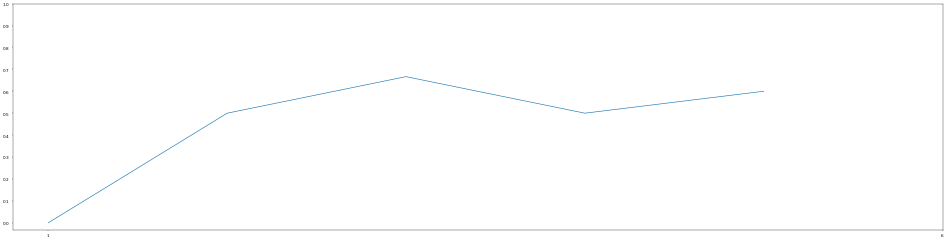

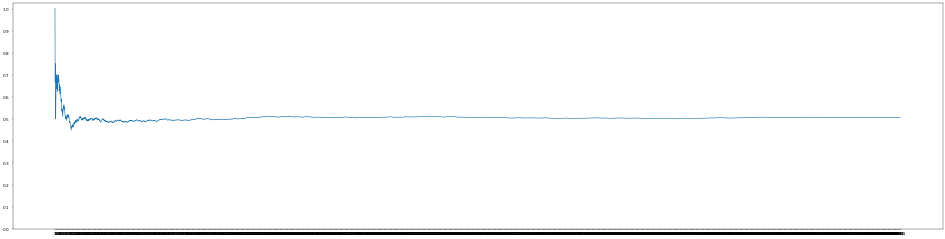

In [3]:
print (coinToss(5))
print (coinToss(5000))

**Answer**
The algorithm exhibits the phenomenon of the law of large numbers, which implies that as the sample size increases, the sample mean converges to the expected value (in this case, 1/2). This trend is also evident from the graph.

## Task 2 Law of large numbers
Try diceRoll function to simulate dice rolls. The function models a series of rolls of two dice and outputs the probability that the sum on the dice will be greater than the parameter k (the proportion of outcomes where the sum is greater than k, relative to all outcomes).

1. What values will the probability converge to at a fixed k and increasing number? What happens if k is set to 6 or 8? How are the obtained probabilities related to the theoretical probabilities?
2. What will the total sum of rolls divided by their number converge to? What will the average difference between the current roll and the obtained mean value converge to?

In [4]:
def diceRoll (number, k):
    sumList,recordList= [], [] 
    rangeList = range(1, number+1)

    for i in rangeList: 
        flip1 = random.randint(1,6) #возвращает число от 1 до 6
        flip2 = random.randint(1,6)
        flipsum = flip1 + flip2
        sumList.append(flipsum)
        recordList.append([flip1, flip2])
    
    print('The probability that dice sum exceedes ' +str(k) +' after ' + str(number) + 
          ' trials: ' + str(sum([x > k for x in sumList])/number))

In [5]:
diceRoll(10000, 4)

The probability that dice sum exceedes 4 after 10000 trials: 0.8416


*1. What values will the probability converge to at a fixed k and increasing number?*
 **Experimental probability will converge to the theoretical one calculated below**

In [12]:
def theoretical_probability (k):

    # elementary outcomes' probability
    k2 = 1/36 
    k3 = 2/36
    k4 = 3/36
    k5 = 4/36
    k6 = 5/36
    k7 = 6/36
    k8 = 5/36
    k9 = 4/36
    k10= 3/36
    k11= 2/36
    k12= 1/36 

    # expected value
    M = 2 * 1/(6*6) + 3* 2/(6*6) + 4* 3/(6*6) \
        + 5* 4/(6*6) + 6* 5/(6*6) + 7* 6/(6*6) \
        + 8* 5/(6*6) + 9* 4/(6*6) + 10* 3/(6*6) \
        + 11* 2/(6*6) + 12* 1/(6*6)

    # probability that the sum overcomes k 
    Over2 = k3+k4+k5+k6+k7+k8+k9+k10+k11+k12
    Over3 = k4+k5+k6+k7+k8+k9+k10+k11+k12
    Over4 = k5+k6+k7+k8+k9+k10+k11+k12
    Over5 = k6+k7+k8+k9+k10+k11+k12
    Over6 = k7+k8+k9+k10+k11+k12
    Over7 = k8+k9+k10+k11+k12
    Over8 = k9+k10+k11+k12
    Over9 = k10+k11+k12
    Over10= k11+k12
    Over11= k12
    Over12= 0

    # interactive part
    dictionary = {2:Over2, 3:Over3, 4:Over4, 
                  5:Over5, 6:Over6, 7:Over7, 
                  8:Over8, 9:Over9, 10:Over10, 
                  11:Over11, 12:Over12}

    print (f'theoretical probability of the outcome being over {k} is {(round(dictionary[k], 4) * 100)}%')
    print (f'expected values is = {int(M)}')

k = int(input('enter a desirable 2d6 outcome:'))

theoretical_probability (k)

enter a desirable 2d6 outcome: 4


theoretical probability of the outcome being over 4 is 83.33%
expected values is = 7


**Answer**
Increasing k will result in a reduction in the likelihood of a positive outcome. As the number of trials increases, the experimental probability will increasingly approximate the theoretical probability. The sample mean will converge to the expected value of 7. The average difference will tend towards zero.

## Task 4 Monte Carlo

The algorithm selects two values, x and y, from the range between -1 and 1, and constructs a point in the plane with coordinates (x, y). Points that fall inside a unit circle centered at zero are colored blue, while points outside the circle are colored red. The number of points generated is determined by the n parameter.

- What is the blue dot proportion tending to? How is it related to the areas of geometric shapes? 
- Analyze how the proportion of blue dots changes with an increase in the number of dots and compare it to the theoretical value of the area.

In [13]:
def plot_circle(n):
  x = 2 * np.random.random(int(n)) - 1
  y = 2 * np.random.random(int(n)) - 1
  insideX, insideY  = x[(x*x+y*y)<=1],y[(x*x+y*y)<=1] #координаты точек внутри
  outsideX, outsideY = x[(x*x+y*y)>1],y[(x*x+y*y)>1] #координаты точек снаружи
  
  print('Number of dots inside the circle:', len(insideX))
  print('Number of dots outside the circle:', (len(outsideX)))
  print('Share of dots inside the circle:', len(insideX)/(len(outsideX)+len(insideX)))
  
  # the plot
  fig, ax = plt.subplots(1)
  ax.scatter(insideX, insideY, c='b', alpha=0.6, edgecolor=None)
  ax.scatter(outsideX, outsideY, c='r', alpha=0.7, edgecolor=None)
  ax.set_aspect('equal')
  fig.show()

Number of dots inside the circle: 3977
Number of dots outside the circle: 1023
Share of dots inside the circle: 0.7954


C:\Users\Ivan\AppData\Local\Temp\ipykernel_16152\3906344471.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


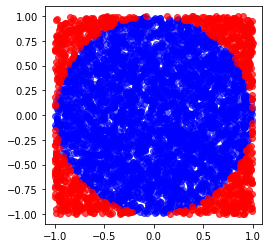

In [14]:
plot_circle(5000)

In [15]:
# area of the circle
r = symbols ('r')
S = pi*r**2
display (S)
S.subs ({pi:3.1415, r:0.5})

pi*r**2

0.785375000000000

**Answer**
With an increasing number of points, the experimental proportion of blue points in the total sample approaches the theoretical one, which is approximately 78.5%, and is equal to the ratio of the area of the circle to the area of the square in which it is inscribed.

## Task 3 Two dice

Below are the tables with sums and products of values when throwing two dice. Using these tables, calculate the probabilities of the following complex events.
<p align="left">
  <img src="https://drive.google.com/uc?id=1If1NDfwPCfLC6JHqxa5IDgXLRzrbB-sI" alt="drawing" width="300"/>
</p>
<p align="left">
  <img src="https://drive.google.com/uc?id=1vWNTqND6br6XzESVSwqKjK9AqeN0-k-4" alt="drawing" width="300"/>
</p>

1. The probability that the resulting sum of the values on the dice is an odd number
2. The probability that the resulting sum of values on the dice is a multiple of three.
3. The probability that the sum will be less than five or greater than ten.
4. The probability that the product of the values will be equal to twelve.
5. Probability that the product of values is odd.

In [16]:
# 1. The probability that the resulting sum of the values on the dice is an odd number
18/36

0.5

In [17]:
# 2. The probability that the resulting sum of values on the dice is a multiple of three.
12/36

0.3333333333333333

In [18]:
# 3. The probability that the sum will be less than five or greater than ten.
(6+3)/36

0.25

In [19]:
# 4. The probability that the product of the values will be equal to twelve.
4/36

0.1111111111111111

In [20]:
# 5. Probability that the product of values is odd.
9/36

0.25

In [21]:
# 6. The probability that the sum of the values will be greater than or equal to their product.
12/36

0.3333333333333333